In [1]:
# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from LinearMPC.MPCVelControl import MPCVelControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

##### Must replace "raise ValueError("State or input constraints violated")" in rocket.py l.423 with 
##### "print(f"State or input constraints violated,\t Alpha = {x0[3]},\t Beta = {x0[4]}")" to run and see the extent of the contraint violation due to non-linearity

In [3]:
Ts = 0.05
sim_time = 20
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 2.0
rocket.fuel_rate = 0.1
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, x_target=x_target, method="nonlinear"
)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

State or input constraints violated,	 Alpha = 10.023437829552774,	 Beta = -9.98361099606521
State or input constraints violated,	 Alpha = 10.041274400891632,	 Beta = -10.032385927846786
State or input constraints violated,	 Alpha = 10.01771031373125,	 Beta = -10.029148873039176
State or input constraints violated,	 Alpha = 9.996193448028787,	 Beta = -10.007492532247808
State or input constraints violated,	 Alpha = 10.003527954385845,	 Beta = -10.000790830718106
State or input constraints violated,	 Alpha = 10.005307999916203,	 Beta = -10.00416053296072
State or input constraints violated,	 Alpha = 10.00383

In [4]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
);

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=399, step=2), IntSlider(value=0…

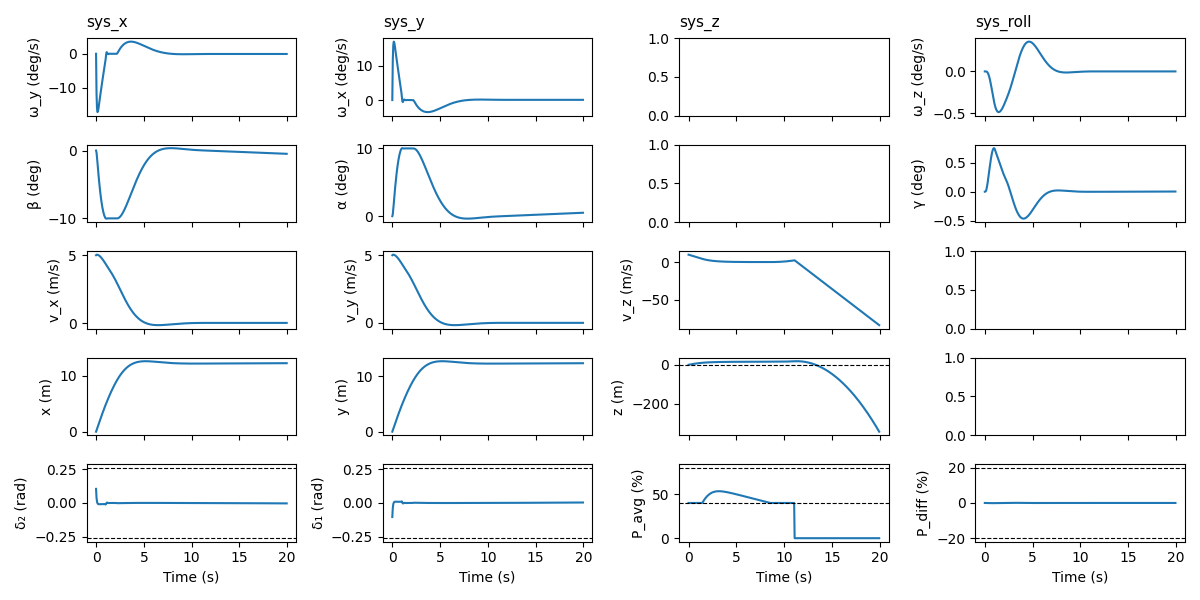

In [5]:
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl)

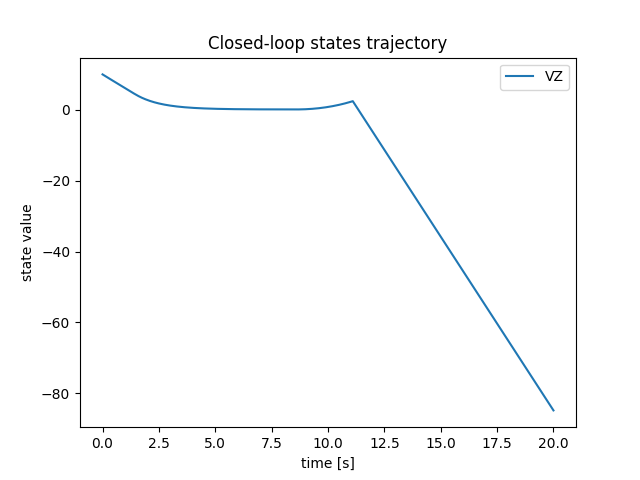

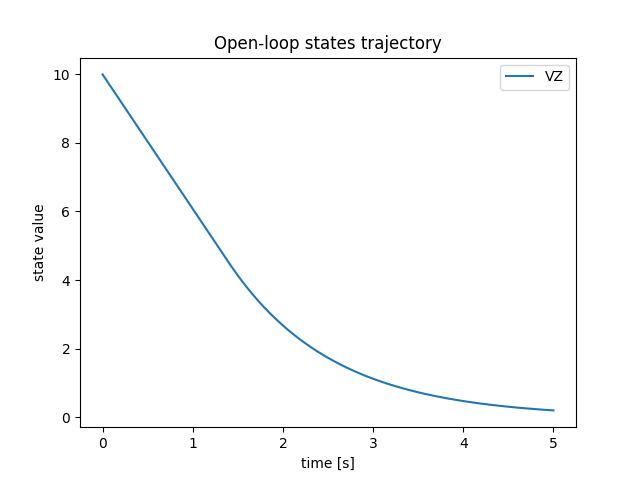

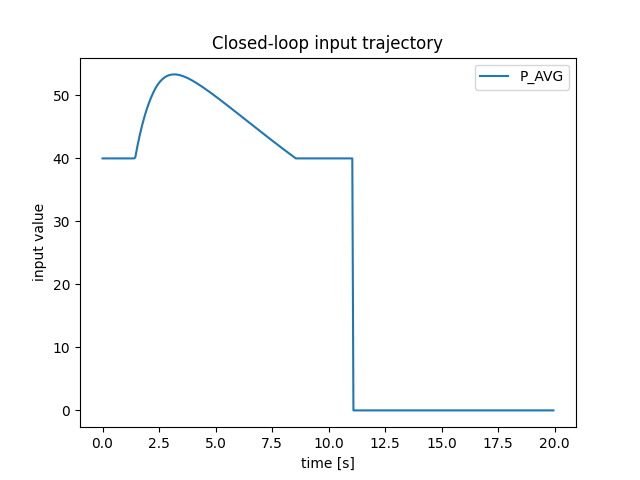

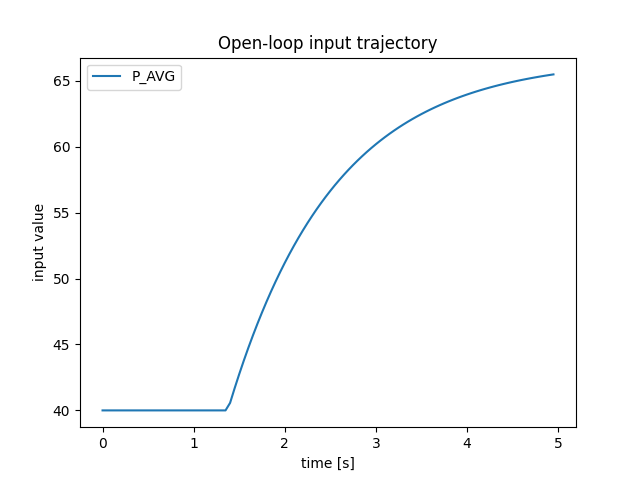

0.11083360239255627


In [7]:
from LinearMPC.utils import plot_trajectory, VZ
plot_trajectory(t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, mpc.mpc_z)
print(np.min(x_cl[VZ, :9*20]))